#Esse caderno será para estudos mais focados em pré processamento, e com redução de dimensionalidade de forma automatizada.

Vamos trabalhar com um dataset médico, no qual temos uma série de exames.

E nosso objetivo é conseguir predizer se a pessoa possui um diagnóstico Benigno ou Maligno realizando a menor quantidade de exames. 
Resultando assim numa maior eficiente médica, visto que será possível definir um tratamento mais rápido.

Além disso, a questão financeira tende a ser favorecida também já que a quantidade de exames poderá ser reduzida.


>Iremos utilizar as seguintes bibliotecas :


*  numpy, pandas, seaborn, matplotlib 
*  sklearn



>Iremos usar os seguintes classificadores:


*   Random Forest Classifier
*   Dummy Classifier
*   



>Iremos usar os seguintes selecionadores:


*   SelectKBest - Que seleciona as 'k' melhores features com base em um teste estatístico, nesse caso iremos de chi2.
*   RFE - Que treina com todos as features e vai removendo recursivamente até chegar na quandidade desejada/ideal. O REF estuda e verifica a importância das features para definir essa remoção. 
* RFECV - RFE com Cross Validation, pega o banco de dados e divide em um numero de blocos, que a gente indica, pelo parâmetro 'cv', e aplica o RFE em cada bloco, avaliando assim a quantidade de features e quais.



> Iremos usar as seguintes técnicas para redução de dimensionalidade para visualização no plano.



*   PCA - através de operações matemáticas ele escolhe as features e as primeiras dimensões terão os maiores volumes de informação.
*   TSNE - é uma técnica mais requintada, contudo, demanda mais poder computacioanal.



Artigo referência: 
>[Artigo Paulo Vasconcelos](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a#:~:text=Sklearn%20RFE&text=Assim%20como%20seu%20nome%20diz,data%20points%20que%20vierem%20nele.)

##Importações das bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import seaborn as sns
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE,RFECV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


## Importando os dados e fazendo uma pré analise das informações

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

In [3]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
#Para conseguirmos ver todas as colunas
pd.set_option('display.max_columns', 50)

In [5]:
df.shape

(569, 35)

In [6]:
#Vamos padronizar a SEED para todos os testes futuros.
SEED = 123143
random.seed(SEED)

Vamos verificar se há dados nulos


In [7]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [8]:
df.drop(columns=['exame_33'], axis = 1, inplace = True)

Vemos que o exame_33 tem 419 dados nulos de 569. Um valor considerável de ausentes, logo, decidimos excluir esses dados. 

In [9]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


###Vamos separar os dados em teste e treino

In [10]:
exames = df.drop(columns = ['id','diagnostico'])
diagnostico = df.diagnostico

In [11]:
SEED = 123143
random.seed(SEED)
treino_x,teste_x,treino_y,teste_y = train_test_split(exames,diagnostico, test_size = 0.3)

In [12]:
treino_x

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.016150,0.2010,0.05769,0.2345,1.2190,1.546,18.24,0.005518,0.02178,0.02589,0.006330,0.02593,0.002157,13.90,23.64,89.27,597.5,0.12560,0.1808,0.19920,0.786,0.05780,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.044970,0.1886,0.06320,0.2456,0.7339,1.667,15.89,0.005884,0.02005,0.02631,0.013040,0.01848,0.001982,12.64,19.67,81.93,475.7,0.14150,0.2170,0.23020,0.786,0.11050,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.104300,0.1538,0.06365,1.0880,1.4100,7.337,122.30,0.006174,0.03634,0.04644,0.015690,0.01145,0.005120,23.14,32.33,155.30,1660.0,0.13760,0.3830,0.48900,0.786,0.17210,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.067590,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.03476,0.016160,0.02434,0.006995,16.01,32.94,106.00,788.0,0.17940,0.3966,0.33810,0.786,0.15210,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.026240,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.14070,0.4186,0.65990,0.786,0.25420,0.2929,0.09873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,14.62,24.02,94.57,103.78,662.7,0.08974,0.08606,0.03102,0.029570,0.1685,0.05866,0.3721,1.1110,2.279,33.76,0.004868,0.01818,0.01121,0.008606,0.02085,0.002893,16.11,29.11,102.90,803.7,0.11150,0.1766,0.09189,0.786,0.06946,0.2522,0.07246
144,10.75,14.97,68.26,103.78,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.74,0.006547,0.01781,0.02018,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.10760,0.1223,0.09755,0.786,0.03413,0.2300,0.06769
133,15.71,13.93,102.00,103.78,761.7,0.09462,0.09462,0.07135,0.059330,0.1816,0.05723,0.3117,0.8155,1.972,27.94,0.005217,0.01515,0.01678,0.012680,0.01669,0.002330,17.50,19.25,114.30,922.8,0.12230,0.1949,0.17090,0.786,0.13740,0.2723,0.07071
282,19.40,18.18,127.20,103.78,1145.0,0.10370,0.14420,0.16260,0.094640,0.1893,0.05892,0.4709,0.9951,2.903,53.16,0.005654,0.02199,0.03059,0.014990,0.01623,0.001965,23.79,28.65,152.40,1628.0,0.15180,0.3749,0.43160,0.786,0.22520,0.3590,0.07787


In [13]:
treino_y.head()

268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

###Vamos começar as classificações e os plots

Iremos realizar o primeiro treinamento, Random Forest

In [14]:
SEED = 123143
random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(exames,diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x,treino_y)

print('O resultado do primeiro classificador Randon Forest foi : %.2f%%'%(classificador.score(teste_x,teste_y)*100))

O resultado do primeiro classificador Randon Forest foi : 92.40%


Iremos realizar o segundo treinamento, agora será o Dummy, usando a estrategia de colocar o valor mais frequente:

In [15]:
SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy = 'most_frequent')
classificador_dummy.fit(treino_x,treino_y)

print('O resultado do segundo classificador,utilizando Dummy Classifier foi : %.2f%%'%(classificador_dummy.score(teste_x,teste_y)*100))

O resultado do segundo classificador,utilizando Dummy Classifier foi : 66.67%


Com isso , de bate e pronto, podemos ver que o Random Forest é muito melhor APARENTEMENTE.

Vamos trabalhar os dados para realizar um plot

In [16]:
dados_plot = pd.concat([diagnostico,exames], axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [17]:
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores') 
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


Iremos plotar os 10 primeiros exames.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

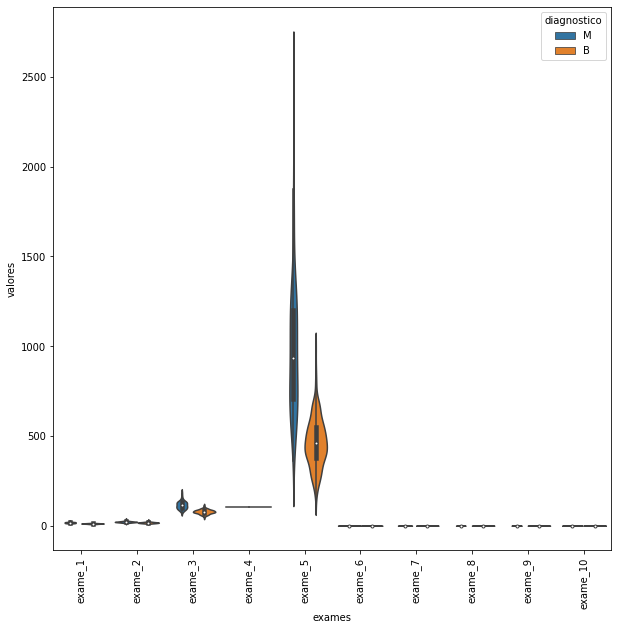

In [18]:
dados_plot = pd.concat([diagnostico, exames.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames',y = 'valores', hue = 'diagnostico', data = dados_plot)
plt.xticks(rotation = 90)

Precisaremos normalizar os dados para melhorar essa visualização

In [19]:
normalizador = StandardScaler()
normalizador.fit(exames)
exames_norm = normalizador.transform(exames)
exames_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Agora vamos criar um DF com esses dados normalizados

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

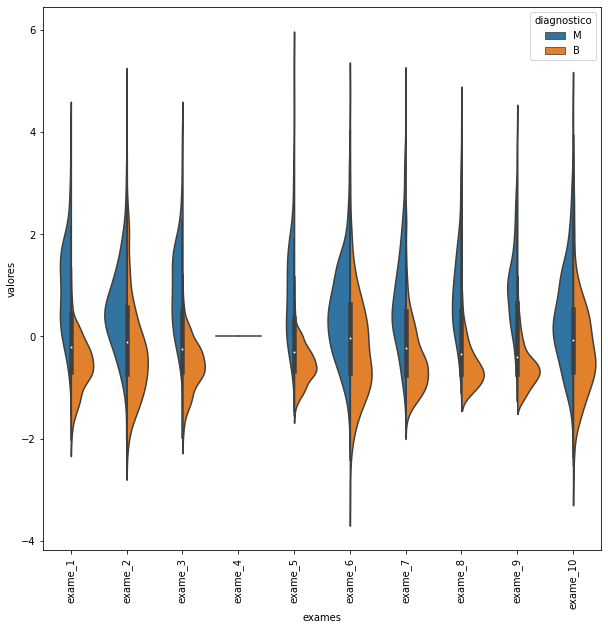

In [20]:
exames_norm = pd.DataFrame(data = exames_norm, columns = exames.keys())

dados_plot = pd.concat([diagnostico, exames_norm.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames',y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
plt.xticks(rotation = 90)


Vamos criar uma função para otimizar o processo

In [21]:
def grafico_violino(exames, inicio, fim):
    
    
    dados_plot = pd.concat([diagnostico, exames.iloc[:,inicio:fim]],axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                         var_name="exames",
                         value_name='valores')
    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    plt.xticks(rotation = 90)



Plotar a segunda leva de gráficos

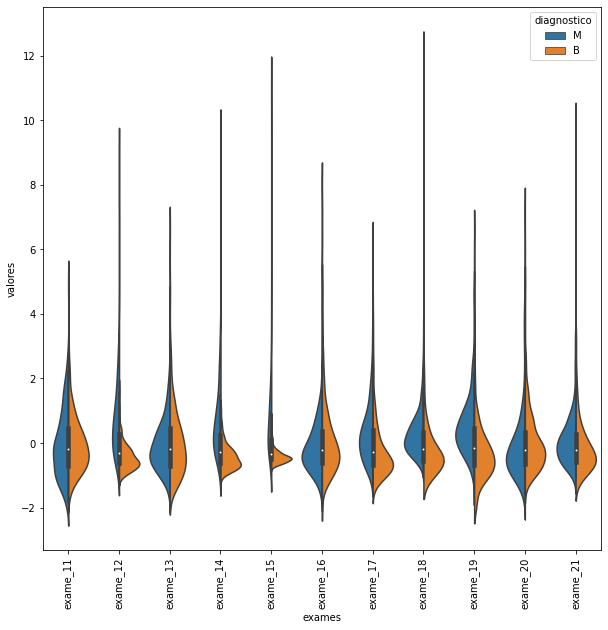

In [22]:
grafico_violino(exames_norm, 10, 21)

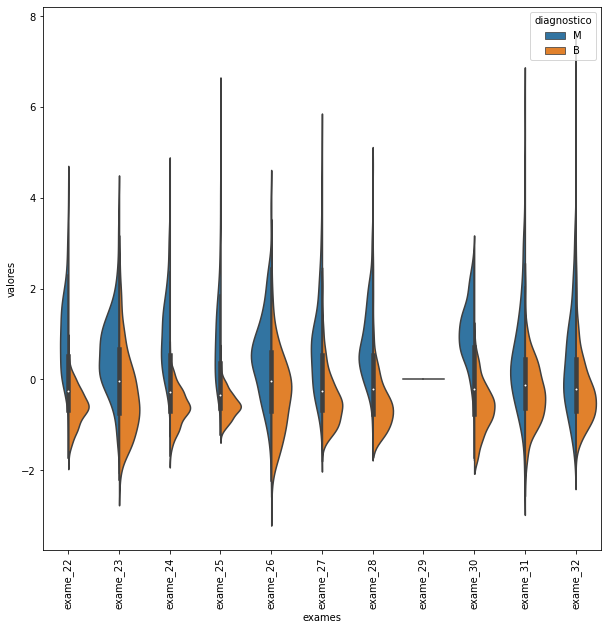

In [23]:
grafico_violino(exames_norm, 21, 32)

Pela analise gráfica podemos ver que os exames 4 e 29 são constantes e de nada agregam ao modelo, e por isso iremos executar drop nessas colunas.

In [24]:
exames_norm = exames_norm.drop(columns=["exame_29", "exame_4"])



Criando uma função que set a seed, separe em teste e treino e chame o classificador Random Forest

In [25]:
def classificar(exames):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(exames, 
                                                        diagnostico,
                                                        test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação Random Forest pós tratamentos é:%.2f%%" %(classificador.score(teste_x,teste_y)*100))


In [26]:
classificar(exames_norm)

Resultado da classificação Random Forest pós tratamentos é:92.98%


Iremos agora plotar um heatmap para entender o comportamento relacional das variaves existentes

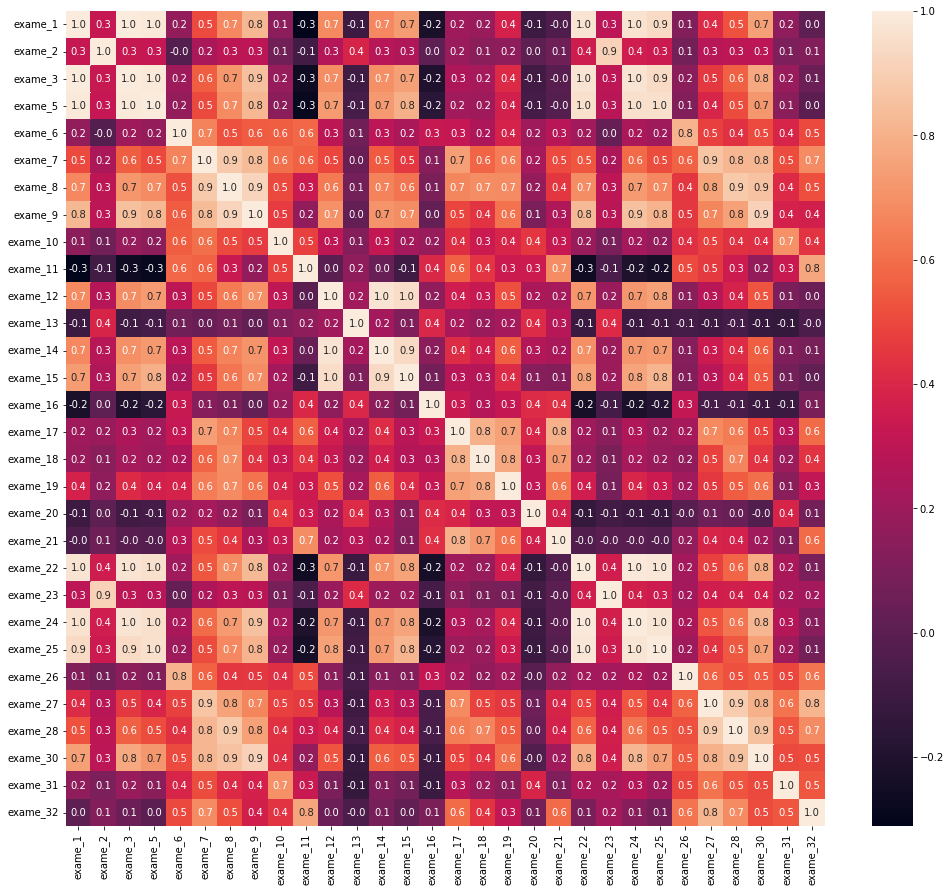

In [27]:
matriz_correlacao = exames_norm.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [28]:
exames_correlacao = matriz_correlacao[matriz_correlacao>0.99]
exames_correlacao

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
variaveis_correlacionadas = exames_correlacao.sum()

In [30]:
variaveis_correlacionadas

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Valores acima de 1 são altamnete correlacionados e deverão ser excluidos.

In [31]:
variaveis_correlacionadas = variaveis_correlacionadas[variaveis_correlacionadas > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [32]:
exames_norm_reduzido = exames_norm.drop(columns = variaveis_correlacionadas.keys())

In [33]:
exames_norm_reduzido

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [34]:
classificar(exames_norm_reduzido)

Resultado da classificação Random Forest pós tratamentos é:91.81%


Selecionando agora os K melhores com SelectKBest, no caso K = 5

In [35]:
selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [36]:
treino_x, teste_x, treino_y, teste_y = train_test_split(exames_norm_reduzido, 
                                                        diagnostico,
                                                        test_size = 0.3)



selecionar_kmelhores.fit(treino_x,treino_y)

ValueError: ignored

Acontece erro pois depois da normalização temos dados negativos, então precisamos usar os dados antes desse procedimento.

In [37]:
exames_final = exames.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

In [38]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(exames_final, 
                                                        diagnostico,
                                                        test_size = 0.3)



selecionar_kmelhores.fit(treino_x,treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [39]:
teste_kbest.shape

(171, 5)

In [40]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação Randon Forest utilizando o selecionador KBest %.2f%%" %(classificador.score(teste_kbest,teste_y)*100))

Resultado da classificação Randon Forest utilizando o selecionador KBest 92.40%


In [41]:
matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))

[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Predição')]

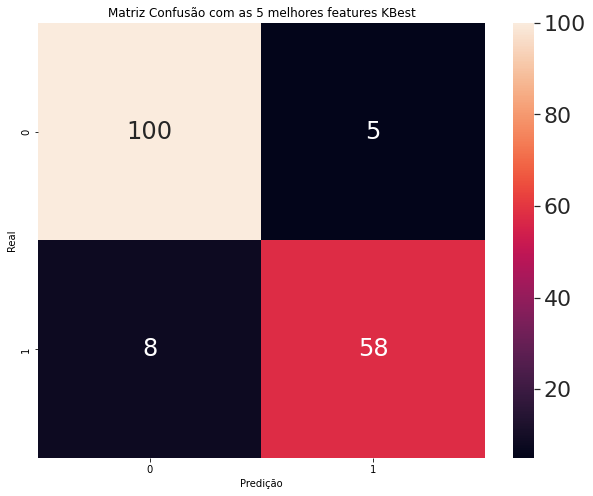

In [42]:
plt.figure(figsize = (10, 8))
plt.title('Matriz Confusão com as 5 melhores features KBest')
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

Agora Iremos tratar com o Seletor RFE
> E precisamos fazer aquele aquele procedimento padrão.... separar dados entre treino e teste, usar um classificador, treinar, selecionar (nesse caso com RFE).Transformar os dados de teste e treino a partir do RFE e treinar o classificador novamente.

In [43]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(exames_final, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)



RandomForestClassifier(random_state=1234)

Text(0.5, 1.0, 'Matriz Confusão com o selecionador RFE')

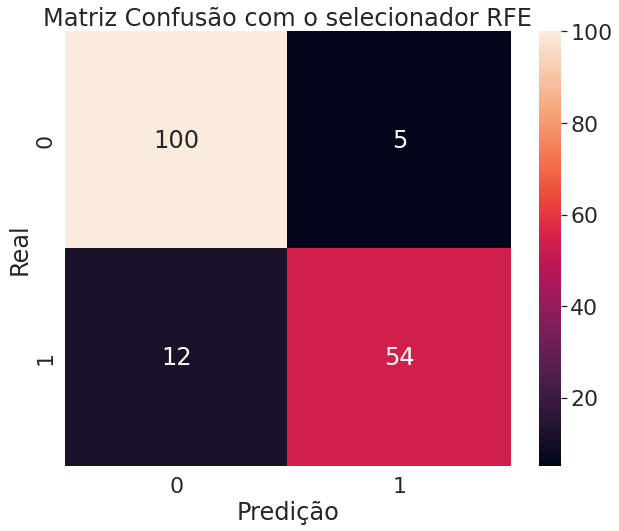

In [44]:
matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")
plt.title('Matriz Confusão com o selecionador RFE')


In [45]:
print("Resultado da classificação Random Forest utilizando o selecionador RFE %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

Resultado da classificação Random Forest utilizando o selecionador RFE 90.06%


Podemos verificar pela a matriz de confusão que esse selecionador teve um resultado complicado em relação as predições.
>O RFE acaba errando mais em relação ao diagnóstico de cânceres malignos.
Mais VN declarados (1 0)

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

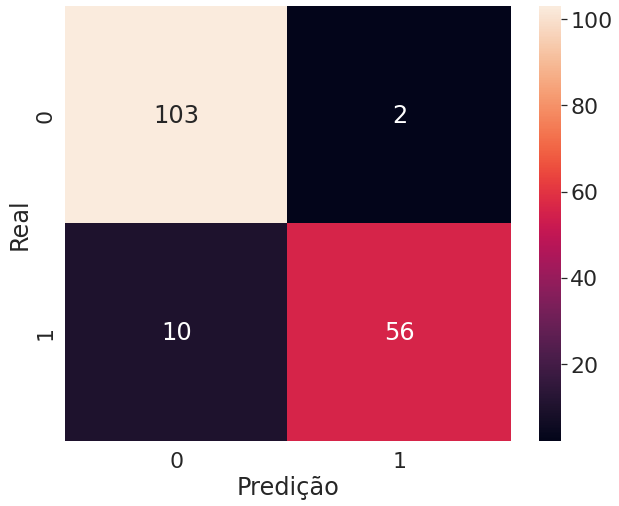

In [46]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(exames_final, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")



In [47]:
print('Resultado da classificação Random Forest utilizando o selecionador RFECV %.2f%%' %(classificador.score(teste_rfecv,teste_y)*100))

Resultado da classificação Random Forest utilizando o selecionador RFECV 92.98%


Em comparação com o método RFE, o RFECV também melhorou as predições quando a pessoa tem um câncer maligno, mas ainda possui 1 erro a mais em comparação com o SelectKBest.

In [48]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

Com o comando selecionador_rfecv.support_], teremos acesso ao número de features utilizado para chegar a esse resultado - nesse caso, 19.

Agora vamos plotar um gráfico e para isso iremos calcular o tamanho necessario para o eixo x... 

In [49]:
len(selecionador_rfecv.grid_scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


28

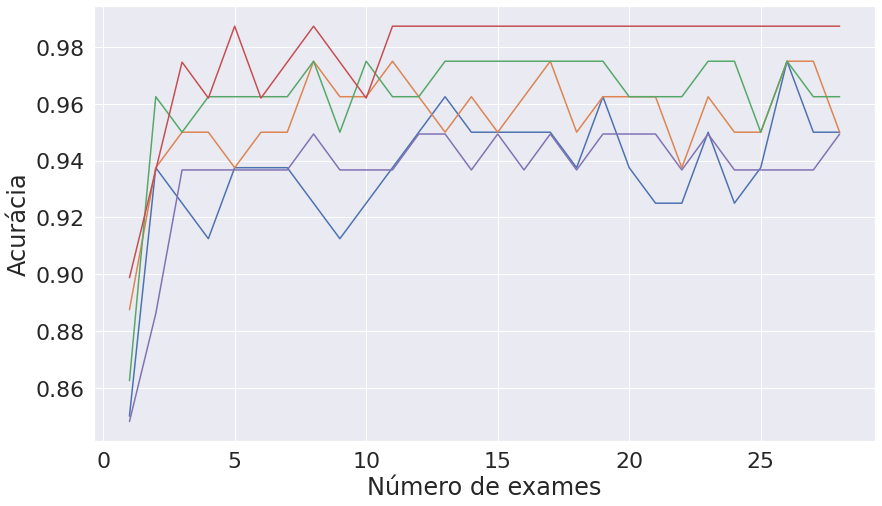

In [50]:
plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
plt.show()

Não esperava um padrão dessa forma e sim como esse proximo grafico




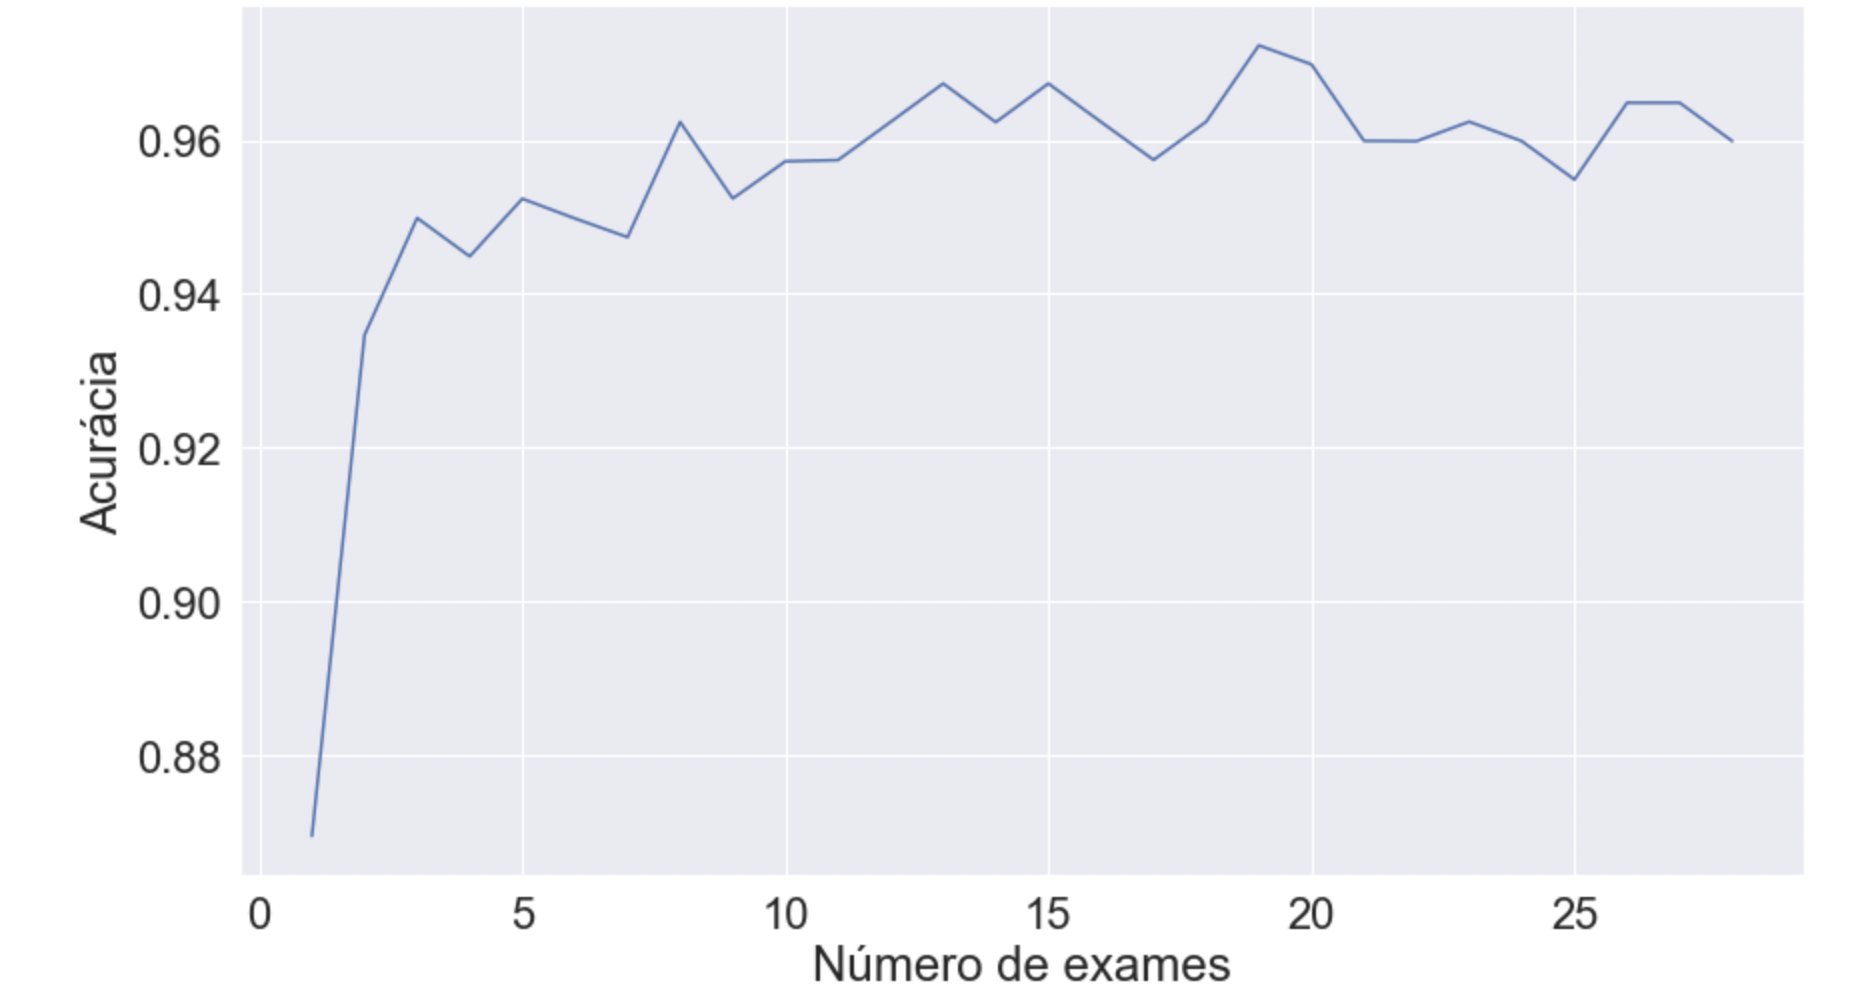

In [56]:
exames_rfe = selecionador_rfe.transform(exames_final)
exames_rfe

array([[3.001e-01, 1.471e-01, 2.538e+01, 2.019e+03, 2.654e-01],
       [8.690e-02, 7.017e-02, 2.499e+01, 1.956e+03, 1.860e-01],
       [1.974e-01, 1.279e-01, 2.357e+01, 1.709e+03, 2.430e-01],
       ...,
       [9.251e-02, 5.302e-02, 1.898e+01, 1.124e+03, 1.418e-01],
       [3.514e-01, 1.520e-01, 2.574e+01, 1.821e+03, 2.650e-01],
       [0.000e+00, 0.000e+00, 9.456e+00, 2.686e+02, 0.000e+00]])

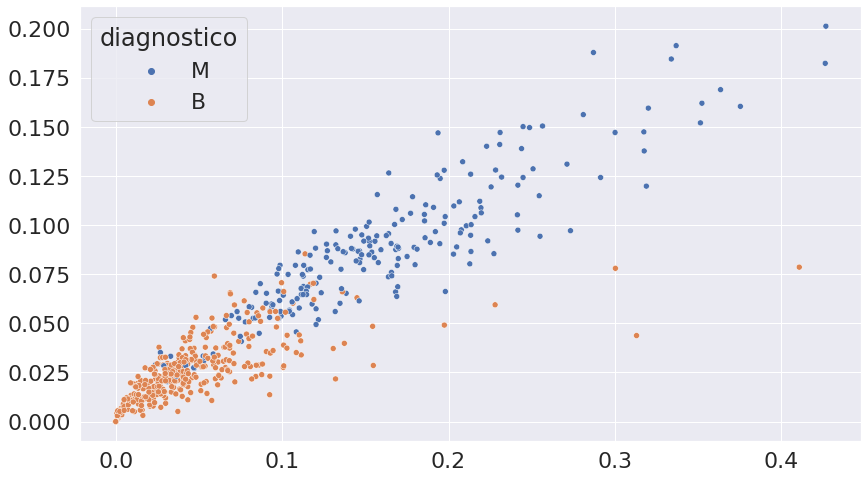

In [58]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = exames_rfe[:,0] , y = exames_rfe[:,1], hue = diagnostico)

Agora vamos usar a redução de dimensionalidade PCA

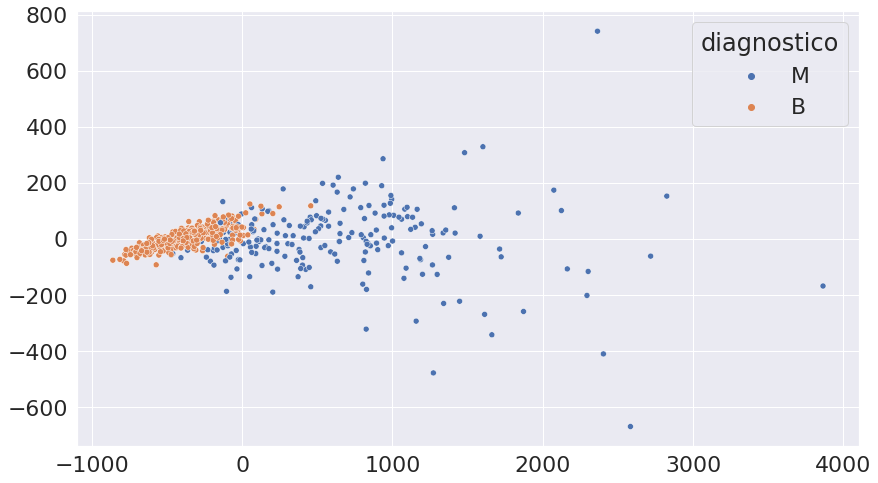

In [59]:
pca = PCA(n_components = 2)
exames_pca = pca.fit_transform(exames_final)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exames_pca[:,0] , y = exames_pca[:,1], hue = diagnostico)

Agora vamos usar a redução de dimensionalidade TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


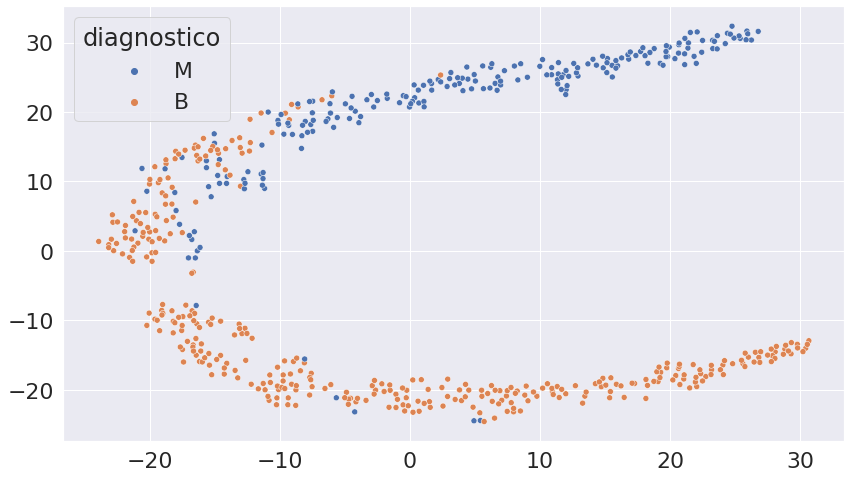

In [61]:
tsne = TSNE(n_components = 2)
exames_tsne = tsne.fit_transform(exames_final)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exames_tsne[:,0] , y = exames_tsne[:,1], hue = diagnostico)

Apesar de ter separado bem os dados eu esperava algo do tipo...
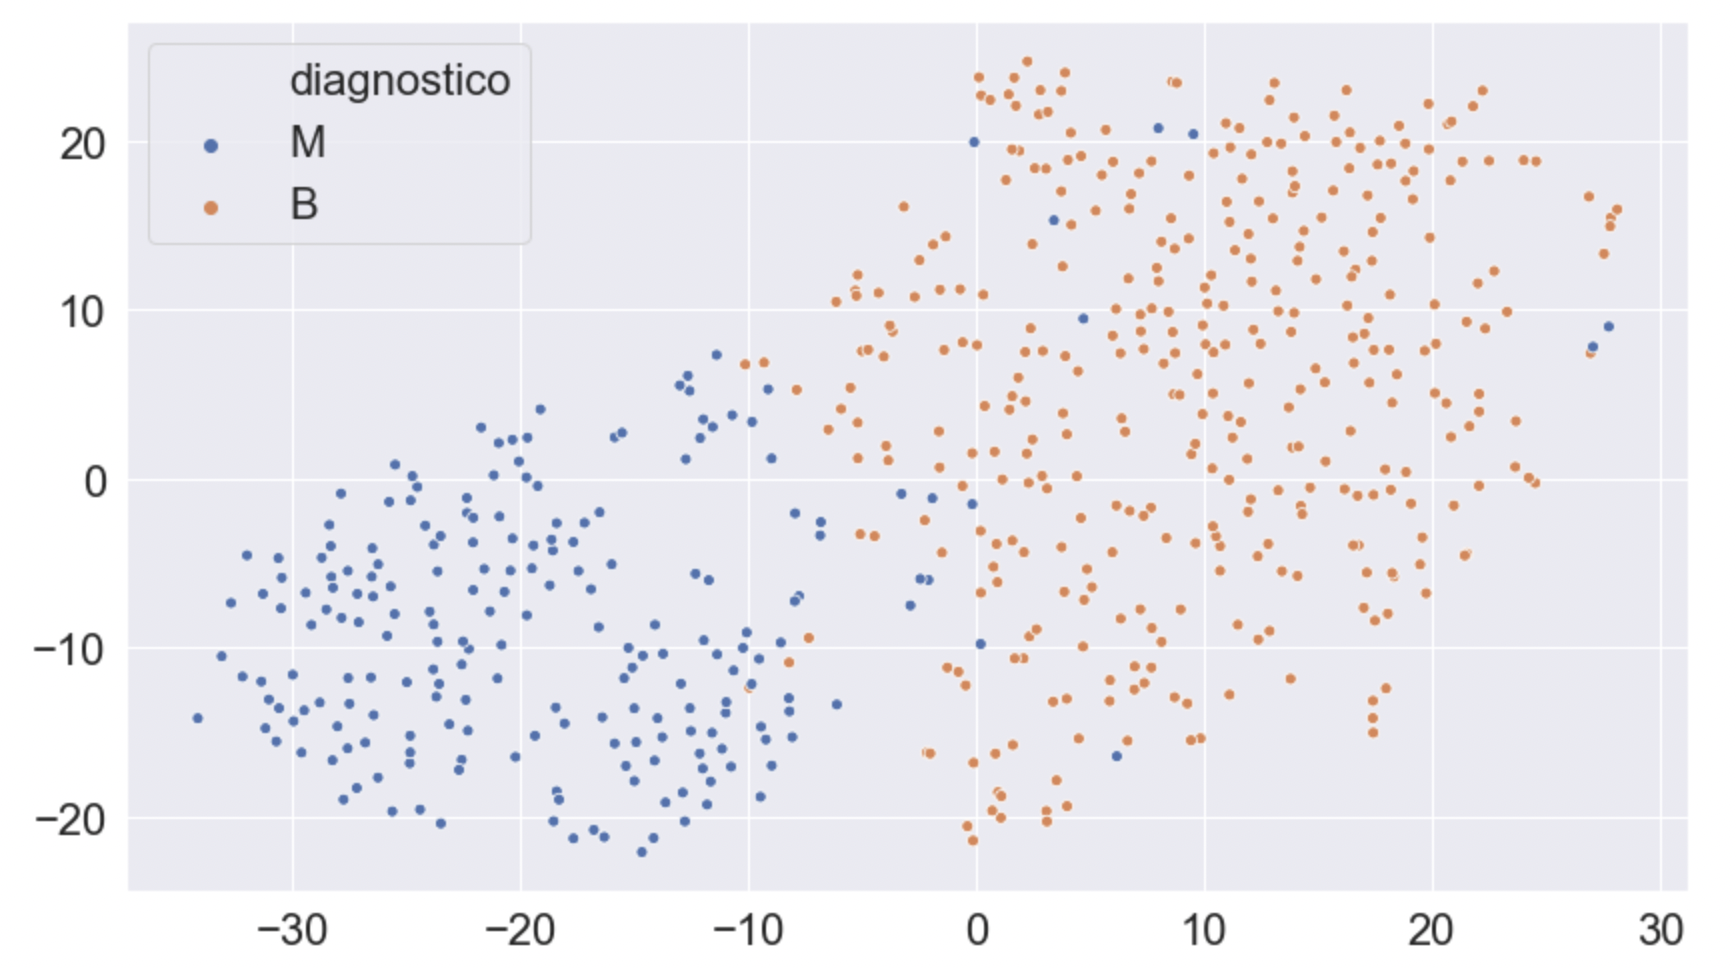